In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import ndimage, spatial
from segmentflow import segment, view
from skimage import measure, morphology
%load_ext autoreload
%autoreload 2

## Load images

Loading images...
--> Images loaded as 3D array:  (200, 200, 200)
--> Plotting images: [  0  66 132 199]


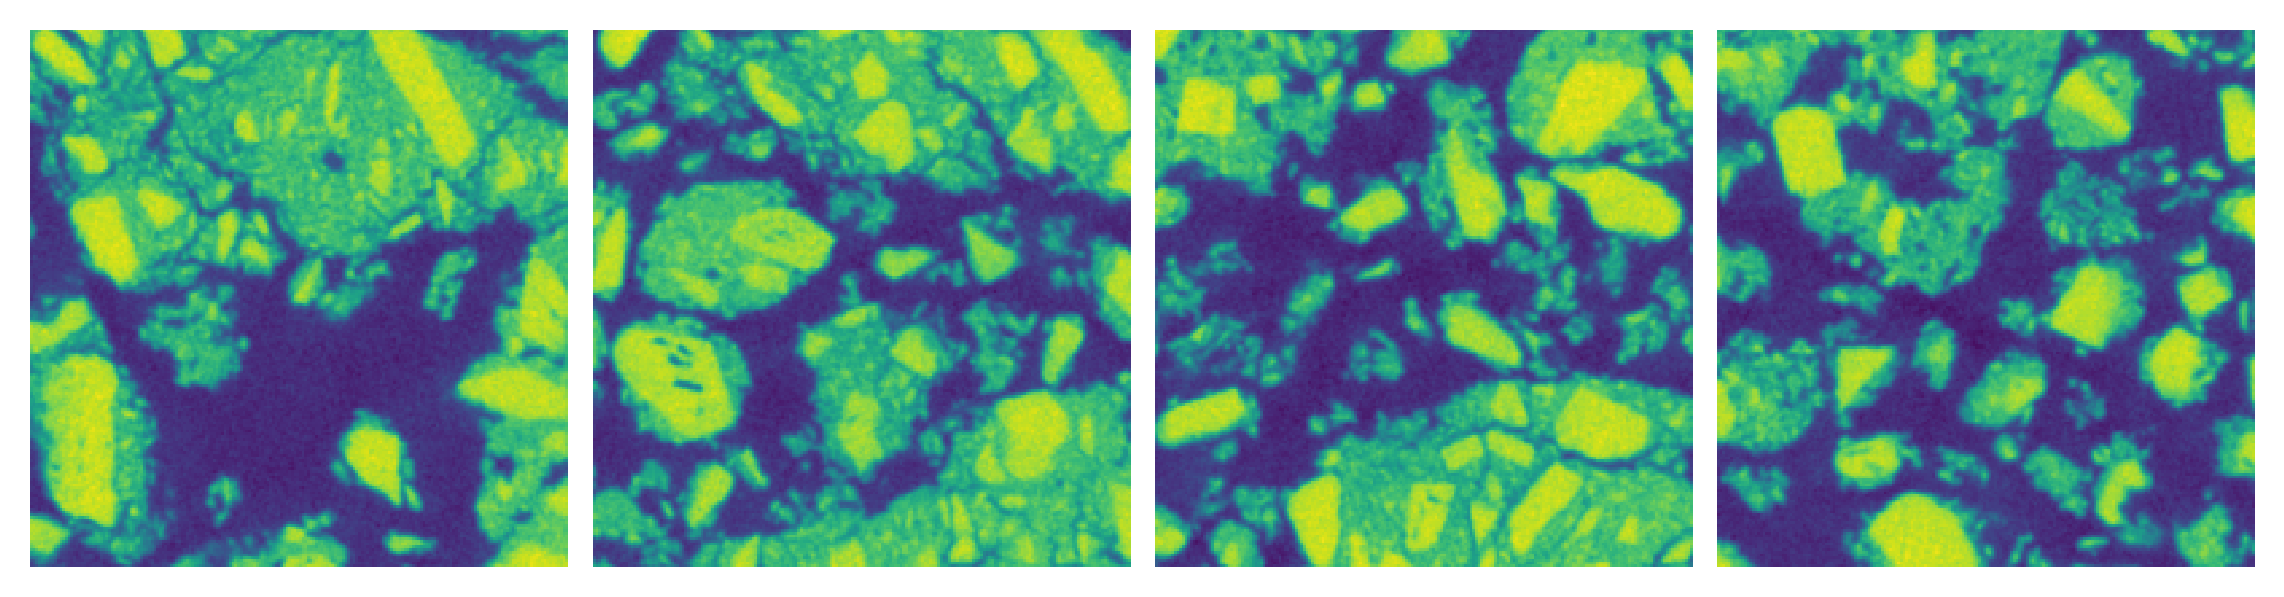

In [4]:
imgs = segment.load_images(
    Path('../data/IP_01-he6_raw'),
    slice_crop=[400, 600],
    row_crop=[400, 600],
    col_crop=[400, 600],
    file_suffix='.tiff')
fig, axes = view.slices(imgs, nslices=4, dpi=300)

### Square footprint (2D image)

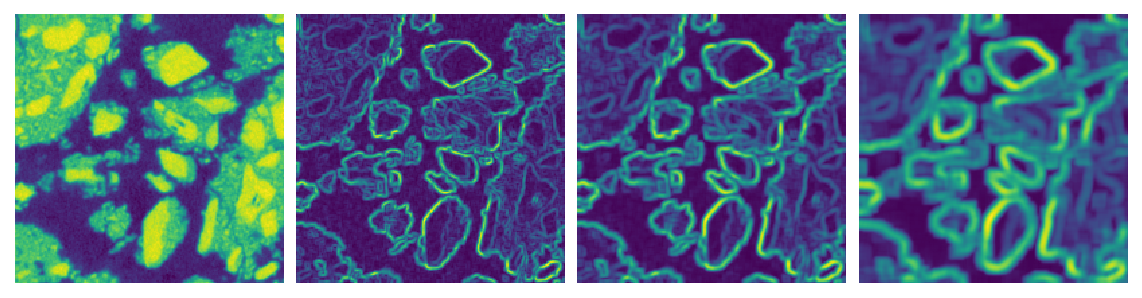

In [5]:
img = imgs[:, :, 100]
stdev_3x3 = ndimage.generic_filter(img, np.std, size=3)
stdev_5x5 = ndimage.generic_filter(img, np.std, size=5)
stdev_10x10 = ndimage.generic_filter(img, np.std, size=10)
fig, ax = view.images([img, stdev_3x3, stdev_5x5, stdev_10x10], dpi=150)

### Cubic footprint (3D image)

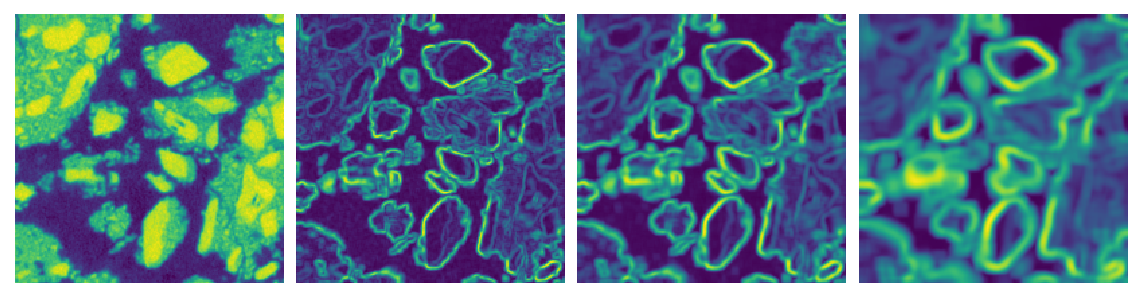

In [6]:
stdev_3cube = ndimage.generic_filter(imgs, np.std, size=3)
stdev_5cube = ndimage.generic_filter(imgs, np.std, size=5)
stdev_10cube = ndimage.generic_filter(imgs, np.std, size=10)
fig, ax = view.images(
    [imgs[..., 100], stdev_3cube[..., 100], stdev_5cube[..., 100],
     stdev_10cube[..., 100]], dpi=150)

### Disk footprint (2D image)

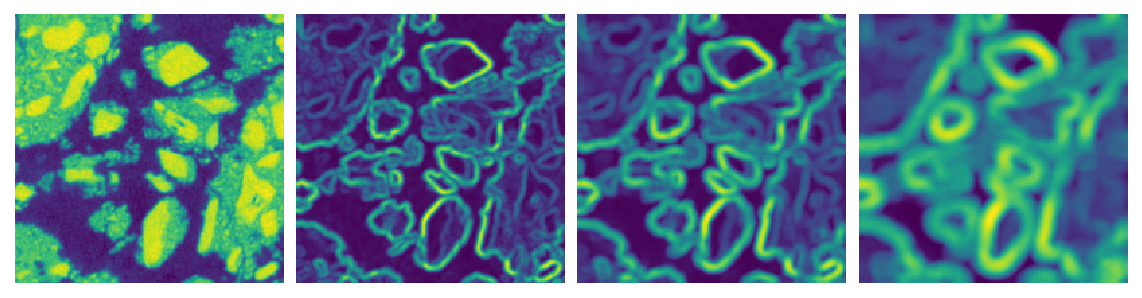

In [7]:
img = imgs[:, :, 100]
stdev_3disk = ndimage.generic_filter(img, np.std, footprint=morphology.disk(3))
stdev_5disk = ndimage.generic_filter(img, np.std, footprint=morphology.disk(5))
stdev_10disk = ndimage.generic_filter(
    img, np.std, footprint=morphology.disk(10))
fig, ax = view.images(
    [img, stdev_3disk, stdev_5disk, stdev_10disk], dpi=150)